In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from read import Nw ,Ww ,Nb ,Wb ,Nk ,Wk ,Wsum, packege_Nw, packege_Nb, packege_Nk
from drawing_utility import draw_scater_line_with_quatients, get_cur_x_of_draw_scater_line,\
    whites_draw_color,browns_draw_color,blacks_draw_color,sum_draw_color,indipendent_sum_draw_color
import statistics_utility
from statistics_of_single_ball import ball_mass_avr_b,ball_mass_avr_k,ball_mass_avr_w
from drawing_utility import show_with_heatmap, show_3D_scatter_projection
from itertools import product
import scipy.special
import tqdm
from find_map_number_of_balls_to_mass import get_distribution_of_masses_around_N_vector,get_expected_total_mass
import Statistical_model

find distribution of weight of each color of the chocolates on the package

In [12]:
a=1.16415
Rq=0.0107086875
for i in [0,10,100]:
    b = get_expected_total_mass(packege_Nw+i,packege_Nb+i,packege_Nk+i,a, Rq, Rq, Rq)
    print(i,b)

0 [ 8.94884344 14.3181495   8.35225388]
10 [6.88322344 9.36118388 6.6078945 ]
100 [-300.84191906 -324.38606925 -298.22590238]


In [2]:
for a in range(5):
    pW = get_distribution_of_masses_around_N_vector(10000,packege_Nw+a,packege_Nb+a,packege_Nk+a)
    print(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2]))
    p_value_arr = [Statistical_model.get_p_value_of_mass_vector(pW[i,0],pW[i,1],pW[i,2]) for i in range(10000)]
    print(a,np.mean(p_value_arr))

[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344 14.3181495   8.35225388]
[ 8.94884344

KeyboardInterrupt: 

In [3]:
pW_mean = np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2])
pW_std = np.std(pW[:,0]),np.std(pW[:,1]),np.std(pW[:,2])
print(pW_mean)
print(pW_std)

(9.371474632682295, 14.057138682238161, 8.186974769625863)
(0.9207227058744633, 0.9150640260649348, 0.90215927948712)


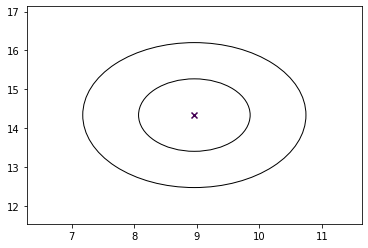

In [4]:
from drawing_utility import draw_mapped_mass_from_N_vector


draw_mapped_mass_from_N_vector(packege_Nw,packege_Nb,packege_Nk)

In [5]:
p_value = Statistical_model.get_p_value_of_mass_vector(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2]))
print(p_value)

0.207183965072435
0.21181039633539137


Text(0, 0.5, 'weight of brown ball group')

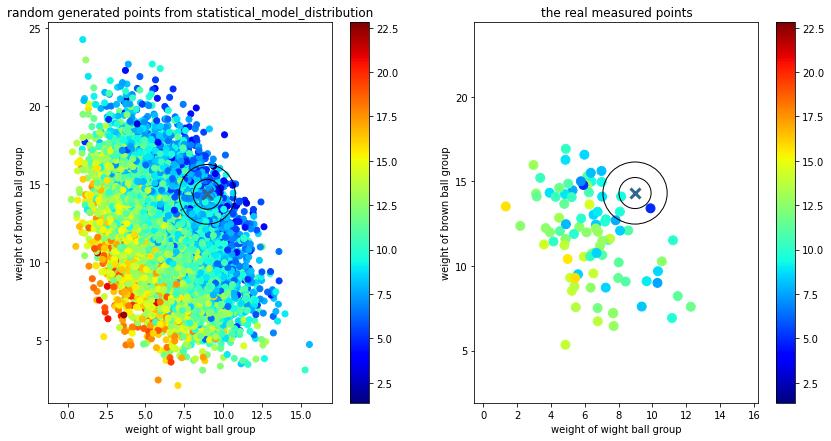

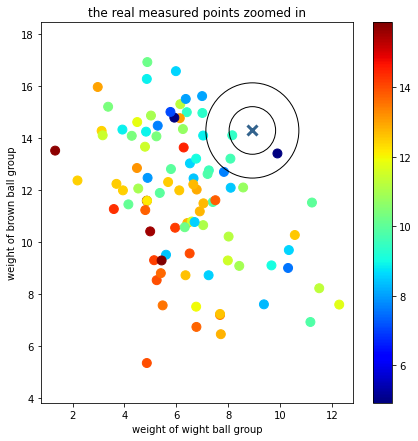

In [6]:
import Statistical_model
_,ax = plt.subplots(1,2,figsize=(14,7))
plt.sca(ax[0])
t = plt.scatter(Statistical_model.W_vector_distribution[:,0],Statistical_model.W_vector_distribution[:,1],c=Statistical_model.W_vector_distribution[:,2],cmap="jet")
plt.colorbar(t)

draw_mapped_mass_from_N_vector(packege_Nw,packege_Nb,packege_Nk,vmin=np.min(Statistical_model.W_vector_distribution[:,2]),vmax=np.max(Statistical_model.W_vector_distribution[:,2]), s=100,linewidths=3)
plt.axis("equal")
l = plt.xlim(),plt.ylim()
plt.title("random generated points from statistical_model_distribution")
plt.xlabel("weight of wight ball group")
plt.ylabel("weight of brown ball group")

plt.sca(ax[1])
t = plt.scatter(Ww,Wb,c=Wk,s=80,cmap="jet",vmin=np.min(Statistical_model.W_vector_distribution[:,2]),vmax=np.max(Statistical_model.W_vector_distribution[:,2]))
plt.colorbar(t)
draw_mapped_mass_from_N_vector(packege_Nw,packege_Nb,packege_Nk,vmin=np.min(Statistical_model.W_vector_distribution[:,2]),vmax=np.max(Statistical_model.W_vector_distribution[:,2]), s=100,linewidths=3)
plt.axis("equal")
plt.xlim(l[0])
plt.ylim(l[1])
plt.title("the real measured points")
plt.xlabel("weight of wight ball group")
plt.ylabel("weight of brown ball group")

plt.figure(figsize=(7,7))
t = plt.scatter(Ww,Wb,c=Wk,s=80,cmap="jet")
plt.colorbar(t)
draw_mapped_mass_from_N_vector(packege_Nw,packege_Nb,packege_Nk,vmin=np.nanmin(Wk),vmax=np.nanmax(Wk), s=100,linewidths=3)
plt.axis("equal")
plt.title("the real measured points zoomed in")
plt.xlabel("weight of wight ball group")
plt.ylabel("weight of brown ball group")

In [7]:
p_value_arr = [Statistical_model.get_p_value_of_mass_vector(pW[i,0],pW[i,1],pW[i,2]) for i in range(10000)]
print(np.mean(p_value_arr))

0.2353539533957379


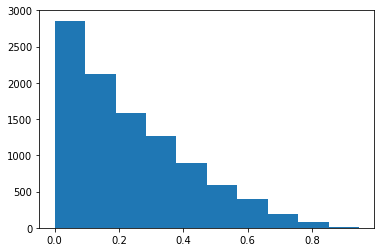

In [8]:
plt.hist(p_value_arr)

Quality Assurance

In [9]:
for i in tqdm.tqdm(range(2,10)):
    pW = get_distribution_of_masses_around_N_vector(10000,Nw[i],Nb[i],Nk[i])
    p_value_arr = [Statistical_model.get_p_value_of_mass_vector(pW[i,0],pW[i,1],pW[i,2]) for i in range(10000)]
    print(np.mean(p_value_arr))

  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:13<01:34, 13.53s/it]

0.6251088030272854


 25%|██▌       | 2/8 [00:27<01:21, 13.52s/it]

0.29545627365066723


 38%|███▊      | 3/8 [00:41<01:09, 13.82s/it]

0.13350530770762797


 50%|█████     | 4/8 [00:55<00:55, 13.87s/it]

0.36185045807608046


 62%|██████▎   | 5/8 [01:08<00:41, 13.72s/it]

0.8114635829516034


 75%|███████▌  | 6/8 [01:22<00:27, 13.85s/it]

0.2322988149770962


 88%|████████▊ | 7/8 [01:37<00:14, 14.19s/it]

0.20965363473411672


100%|██████████| 8/8 [01:51<00:00, 13.93s/it]

0.6388121688906592
